<h1>DUNEX Data Exploration Notebook </h1>
Written By: EJ Rainville, Fall 2021

In [19]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import netCDF4 as nc
from scipy import signal
from scipy import fft
from scipy import interpolate
import cftime
import sys

# Import DUNEX Tools
sys.path.insert(1, '../tools/')
import microSWIFTTools
%matplotlib widget

<h2> Plotting Accelerations from Mission 1 and building the Mission Accels Function</h2>

['microSWIFT_3', 'microSWIFT_4', 'microSWIFT_5', 'microSWIFT_38', 'microSWIFT_39']


Text(0.5, 0, 'Time')

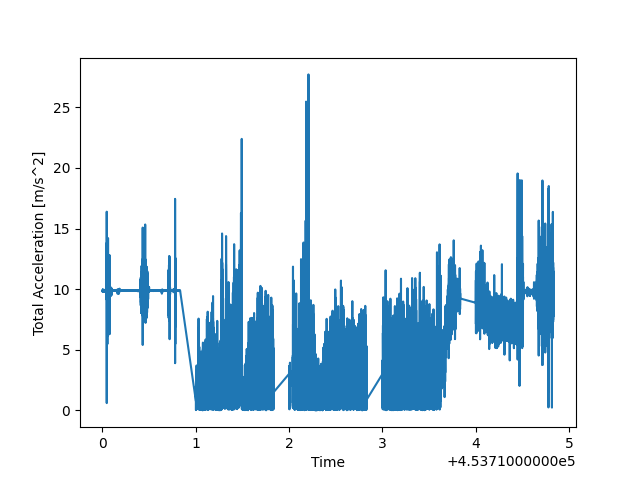

In [18]:
# Mission 1 netCDF path
mission_nc_path = '../microSWIFT_data/mission_1/mission_1.nc'

# Load in netCDF file as a dataset
mission_dataset = nc.Dataset(mission_nc_path, mode='r')

# Get list of all microSWIFTs on the mission
microSWIFTs_on_mission = list(mission_dataset.groups.keys())
print(microSWIFTs_on_mission)

# Get Datetime values 
time = cftime.num2pydate(mission_dataset['microSWIFT_3']['IMU']['time'],units=mission_dataset['microSWIFT_3']['IMU']['time'].units, calendar=mission_dataset['microSWIFT_3']['IMU']['time'].calendar)

# Compute Total Acceleration 
accel_x = np.array(mission_dataset['microSWIFT_3']['IMU']['accel_x'][:])
accel_y = np.array(mission_dataset['microSWIFT_3']['IMU']['accel_y'][:])
accel_z = np.array(mission_dataset['microSWIFT_3']['IMU']['accel_z'][:])
tot_accel = np.sqrt(np.square(accel_x) + np.square(accel_y), np.square(accel_z))

# Plot the Vertical Accelerations from the mission for one microSWIFT
fig, ax = plt.subplots()
ax.plot(time, tot_accel)
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.set_ylabel('Total Acceleration [m/s^2]')
ax.set_xlabel('Time')
